In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive/')

['MyDrive', '.file-revisions-by-id', '.shortcut-targets-by-id', '.Trash-0']

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train-data.csv',index_col=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.shape

(6019, 13)

In [ ]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [ ]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
df1 = df.drop('New_Price',axis='columns')
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
df1['Year'] = 2022 - df1['Year']
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,12,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,7,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,11,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,10,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,9,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
t = '26.6 km/kg'
float(t.split(' ')[0])

26.6

In [ ]:
def modify_mileage(x):
  try:
    return float(x.split(' ')[0])
  except:
    return 0

In [ ]:
modify_mileage('15.2 kmpl')

15.2

In [ ]:
'''
types = []
for val in df1['Mileage'].apply(modify_mileage):
  types.append((type(val) == float))
'''

"\ntypes = []\nfor val in df1['Mileage'].apply(modify_mileage):\n  types.append((type(val) == float))\n"

In [ ]:
df1['Mileage'] = df1['Mileage'].apply(modify_mileage)

In [ ]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,12,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,7,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,11,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,10,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,9,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
def modify_engine(x):
  try:
    return float(x.split(' ')[0])
  except:
    return 0

In [ ]:
df1['Engine'] = df1['Engine'].apply(modify_engine)

In [ ]:
#lambda
myfunc = lambda x : 2 * x
myfunc(4)

8

In [ ]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,12,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,7,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,11,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,10,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,9,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [ ]:
#df1[df1['Engine'].apply(lambda x: type(x) != str)]

In [ ]:
def abc(x):
  try:
    return float(x.split(' ')[0])
  except:
    return 0

In [ ]:
abc('33.2 km/l')

33.2

In [ ]:
import numpy as np
abc(np.nan)

0

In [ ]:
def modify_power(x):
  try:
    return float(x.split(' ')[0])
  except:
    return 0

In [ ]:
df1['Power'] = df1['Power'].apply(modify_power)
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,12,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,7,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,11,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,10,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,9,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [ ]:
df1.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [ ]:
df1 = df1.fillna(0)

In [ ]:
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
(df1 == 0).sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 43
Price                  0
dtype: int64

In [ ]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,12,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,7,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,11,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,10,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,9,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [ ]:
df1['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64

In [ ]:
def modify_name(x):
  z = x.split(' ')[0:2]
  sep = ' '
  return sep.join(z)

modify_name('Maruti Swift VDI BSIV')

'Maruti Swift'

In [ ]:
df1['Name'] = df1['Name'].apply(lambda x : ' '.join(x.split(' ')[0:2]))
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,12,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta,Pune,7,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,11,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga,Chennai,10,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4,Coimbatore,9,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [ ]:
car_counts = df1['Name'].value_counts()
car_counts

Maruti Swift          353
Honda City            270
Hyundai i20           247
Hyundai Verna         170
Toyota Innova         164
                     ... 
Fiat Petra              1
Volkswagen Beetle       1
Ambassador Classic      1
Smart Fortwo            1
Jaguar F                1
Name: Name, Length: 216, dtype: int64

In [ ]:
#df1['Name'].value_counts().plot.bar(figsize=(10,8))

In [ ]:
(car_counts >= 50).sum()

37

In [ ]:
car_samples_more_then_50 = car_counts[car_counts >= 50]
car_samples_more_then_50

Maruti Swift             353
Honda City               270
Hyundai i20              247
Hyundai Verna            170
Toyota Innova            164
Hyundai i10              156
Maruti Wagon             154
Hyundai Grand            152
Volkswagen Polo          151
Maruti Alto              143
Mahindra XUV500          113
Volkswagen Vento         107
Honda Amaze              106
Ford Figo                101
Toyota Fortuner          101
BMW 3                     98
Mercedes-Benz New         94
Hyundai Creta             93
Mercedes-Benz E-Class     88
Renault Duster            83
Audi A4                   78
Hyundai Santro            78
Maruti Ertiga             75
Maruti Ciaz               71
BMW 5                     68
Toyota Corolla            68
Maruti Ritz               64
Maruti Baleno             63
Mahindra Scorpio          61
Toyota Etios              61
Hyundai EON               61
Land Rover                60
Honda Brio                60
Hyundai Xcent             59
Maruti Celerio

In [ ]:
'Maruti Swift' in car_samples_more_then_50

True

In [ ]:
'Jaguar F' in car_samples_more_then_50

False

In [ ]:
df2 = df1[df1['Name'].apply(lambda x : x in car_samples_more_then_50)]
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,12,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta,Pune,7,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,11,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga,Chennai,10,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4,Coimbatore,9,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [ ]:
df2['Location'].value_counts()

Mumbai        512
Hyderabad     489
Kochi         437
Delhi         416
Coimbatore    407
Pune          399
Kolkata       395
Chennai       304
Jaipur        281
Bangalore     239
Ahmedabad     161
Name: Location, dtype: int64

In [ ]:
df2['Fuel_Type'].value_counts()

Diesel    2015
Petrol    1973
CNG         42
LPG         10
Name: Fuel_Type, dtype: int64

In [ ]:
df2['Fuel_Type'] = df2['Fuel_Type'].apply(lambda x : 'Others' 
                                          if x in ['CNG','LPG'] else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['Fuel_Type'].value_counts()

Diesel    2015
Petrol    1973
Others      52
Name: Fuel_Type, dtype: int64

In [ ]:
df2['Transmission'].value_counts()

Manual       3133
Automatic     907
Name: Transmission, dtype: int64

In [ ]:
df2['Owner_Type'].value_counts()

First             3373
Second             608
Third               54
Fourth & Above       5
Name: Owner_Type, dtype: int64

In [ ]:
df2['Owner_Type'] = df2['Owner_Type'].apply(lambda x : 'Second or above' 
                                            if x not in ['First'] else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['Owner_Type'].value_counts()

First              3373
Second or above     667
Name: Owner_Type, dtype: int64

In [ ]:
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,12,72000,Others,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta,Pune,7,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,11,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga,Chennai,10,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4,Coimbatore,9,40670,Diesel,Automatic,Second or above,15.20,1968.0,140.80,5.0,17.74


In [ ]:
(df2 == 0).sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               47
Engine                32
Power                108
Seats                 35
Price                  0
dtype: int64

In [ ]:
df2[df2['Mileage'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover,Pune,10,85000,Diesel,Automatic,Second or above,0.0,2179.0,115.00,5.0,17.50
79,Hyundai Santro,Hyderabad,17,87591,Petrol,Manual,First,0.0,1086.0,0.00,5.0,1.30
194,Honda City,Ahmedabad,15,60006,Petrol,Manual,First,0.0,0.0,0.00,0.0,2.95
229,Ford Figo,Bangalore,7,70436,Diesel,Manual,First,0.0,1498.0,99.00,0.0,3.60
262,Hyundai Santro,Hyderabad,16,99000,Petrol,Manual,First,0.0,1086.0,0.00,5.0,1.75
307,Hyundai Santro,Chennai,16,58000,Petrol,Manual,Second or above,0.0,1086.0,0.00,5.0,1.50
443,Hyundai Santro,Coimbatore,10,50243,Petrol,Manual,First,0.0,1086.0,0.00,5.0,3.35
544,Mercedes-Benz New,Kochi,3,13190,Petrol,Automatic,First,0.0,1950.0,181.43,5.0,38.99
631,Hyundai Santro,Chennai,20,70000,Petrol,Manual,Second or above,0.0,1086.0,0.00,5.0,0.65
647,Hyundai Santro,Jaipur,18,200000,Petrol,Manual,First,0.0,1086.0,0.00,5.0,0.80


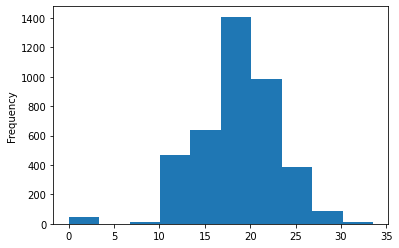

In [ ]:
df2['Mileage'].plot.hist()

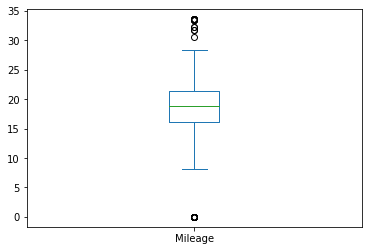

In [ ]:
df2['Mileage'].plot.box()

In [ ]:
cols_name = ['Name','Location','Fuel_Type','Transmission','Owner_Type']

for col in cols_name:
  print(df2.groupby(col)['Mileage'].mean())

Name
Audi A4                  16.400897
BMW 3                    18.143776
BMW 5                    17.442059
Ford Ecosport            21.466792
Ford Figo                19.435446
Honda Amaze              22.054717
Honda Brio               18.661667
Honda City               18.215556
Honda Jazz               20.470690
Hyundai Creta            17.559247
Hyundai EON              21.118033
Hyundai Grand            20.242105
Hyundai Santro           10.143718
Hyundai Verna            19.402059
Hyundai Xcent            21.818644
Hyundai i10              19.732885
Hyundai i20              19.542389
Land Rover               10.959167
Mahindra Scorpio         12.776393
Mahindra XUV500          15.550442
Maruti Alto              22.666993
Maruti Baleno            21.891587
Maruti Celerio           23.711379
Maruti Ciaz              24.249577
Maruti Ertiga            20.923600
Maruti Ritz              21.150938
Maruti Swift             21.510737
Maruti Wagon             20.967143
Mercedes-Benz E

In [ ]:
#Divide the data into two parts :- dfm0:- Mileage value is 0, 
                                  #dfm1:- mileage value is non zero
dfm0 = df2[df2['Mileage'] == 0]
dfm1 = df2[df2['Mileage'] != 0]

In [ ]:
dfm0['Mileage'] = dfm0['Transmission'].apply(lambda x: 16.35 
                                             if x == 'Automatic' else 19.34)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Combine back the two data frames
#concat() :- to combine multiple data frame
df3 = pd.concat((dfm0,dfm1))
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover,Pune,10,85000,Diesel,Automatic,Second or above,16.35,2179.0,115.0,5.0,17.50
79,Hyundai Santro,Hyderabad,17,87591,Petrol,Manual,First,19.34,1086.0,0.0,5.0,1.30
194,Honda City,Ahmedabad,15,60006,Petrol,Manual,First,19.34,0.0,0.0,0.0,2.95
229,Ford Figo,Bangalore,7,70436,Diesel,Manual,First,19.34,1498.0,99.0,0.0,3.60
262,Hyundai Santro,Hyderabad,16,99000,Petrol,Manual,First,19.34,1086.0,0.0,5.0,1.75


In [ ]:
for col in cols_name:
  print(df3.groupby(col)['Engine'].mean())

Name
Audi A4                  2020.871795
BMW 3                    2046.091837
BMW 5                    2185.941176
Ford Ecosport            1469.905660
Ford Figo                1350.386139
Honda Amaze              1353.735849
Honda Brio               1198.000000
Honda City               1472.574074
Honda Jazz               1250.396552
Hyundai Creta            1573.580645
Hyundai EON               820.032787
Hyundai Grand            1180.210526
Hyundai Santro            980.730769
Hyundai Verna            1568.264706
Hyundai Xcent            1167.169492
Hyundai i10              1165.692308
Hyundai i20              1272.732794
Land Rover               2351.933333
Mahindra Scorpio         2207.950820
Mahindra XUV500          2172.557522
Maruti Alto               861.419580
Maruti Baleno            1222.920635
Maruti Celerio            983.862069
Maruti Ciaz              1314.126761
Maruti Ertiga            1280.853333
Maruti Ritz              1229.671875
Maruti Swift             1205.328

In [ ]:
dfe0 = df3[df3['Engine'] == 0]
dfe1 = df3[df3['Engine'] != 0]

In [ ]:
dfe0['Engine'] = dfe0['Fuel_Type'].apply(lambda x : 1777.08 if x == 'Diesel' 
                                         else (1030.03 if x == 'Others' 
                                               else 1253.75))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4 = pd.concat((dfe0,dfe1))
df4.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City,Ahmedabad,15,60006,Petrol,Manual,First,19.34,1253.75,0.0,0.0,2.95
749,Land Rover,Mumbai,14,55001,Diesel,Automatic,Second or above,16.35,1777.08,0.0,0.0,26.50
1385,Honda City,Pune,18,115000,Petrol,Manual,Second or above,19.34,1253.75,0.0,0.0,1.50
1460,Land Rover,Coimbatore,14,69078,Petrol,Manual,First,19.34,1253.75,0.0,0.0,40.88
2096,Hyundai Santro,Coimbatore,18,52146,Petrol,Manual,First,19.34,1253.75,0.0,0.0,1.93


In [ ]:
for col in cols_name:
  print(df4.groupby(col)['Power'].mean())

Name
Audi A4                  161.536538
BMW 3                    186.627347
BMW 5                    193.860000
Ford Ecosport             95.120189
Ford Figo                 76.110297
Honda Amaze               92.973396
Honda Brio                86.800000
Honda City               109.141481
Honda Jazz                89.674138
Hyundai Creta            121.831183
Hyundai EON               55.611475
Hyundai Grand             79.016974
Hyundai Santro            23.155128
Hyundai Verna            120.294353
Hyundai Xcent             77.046271
Hyundai i10               75.877244
Hyundai i20               84.459312
Land Rover               180.122000
Mahindra Scorpio         119.095082
Mahindra XUV500          140.265487
Maruti Alto               52.788112
Maruti Baleno             80.444444
Maruti Celerio            65.357586
Maruti Ciaz               90.603521
Maruti Ertiga             89.339467
Maruti Ritz               78.190313
Maruti Swift              72.145354
Maruti Wagon           

In [ ]:
cars_avg_power = df4.groupby('Name')['Power'].mean()
cars_avg_power

Name
Audi A4                  161.536538
BMW 3                    186.627347
BMW 5                    193.860000
Ford Ecosport             95.120189
Ford Figo                 76.110297
Honda Amaze               92.973396
Honda Brio                86.800000
Honda City               109.141481
Honda Jazz                89.674138
Hyundai Creta            121.831183
Hyundai EON               55.611475
Hyundai Grand             79.016974
Hyundai Santro            23.155128
Hyundai Verna            120.294353
Hyundai Xcent             77.046271
Hyundai i10               75.877244
Hyundai i20               84.459312
Land Rover               180.122000
Mahindra Scorpio         119.095082
Mahindra XUV500          140.265487
Maruti Alto               52.788112
Maruti Baleno             80.444444
Maruti Celerio            65.357586
Maruti Ciaz               90.603521
Maruti Ertiga             89.339467
Maruti Ritz               78.190313
Maruti Swift              72.145354
Maruti Wagon           

In [ ]:
cars_avg_power['Toyota Corolla']

126.66970588235293

In [ ]:
"{:.2f}".format(cars_avg_power['Toyota Corolla'])

'126.67'

In [ ]:
dfp0 = df4[df4['Power'] == 0]
dfp1 = df4[df4['Power'] != 0]

In [ ]:
dfp0['Power'] = dfp0['Name'].apply(lambda x : "{:.2f}".format(cars_avg_power[x]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df5 = pd.concat((dfp0,dfp1))
df5.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City,Ahmedabad,15,60006,Petrol,Manual,First,19.34,1253.75,109.14,0.0,2.95
749,Land Rover,Mumbai,14,55001,Diesel,Automatic,Second or above,16.35,1777.08,180.12,0.0,26.50
1385,Honda City,Pune,18,115000,Petrol,Manual,Second or above,19.34,1253.75,109.14,0.0,1.50
1460,Land Rover,Coimbatore,14,69078,Petrol,Manual,First,19.34,1253.75,180.12,0.0,40.88
2096,Hyundai Santro,Coimbatore,18,52146,Petrol,Manual,First,19.34,1253.75,23.16,0.0,1.93


In [ ]:
df5['Seats'].value_counts()

5.0    3465
7.0     416
8.0     108
0.0      35
4.0      14
9.0       1
6.0       1
Name: Seats, dtype: int64

In [ ]:
car_seats = df5.groupby('Name')['Seats'].max()
car_seats

Name
Audi A4                  5.0
BMW 3                    5.0
BMW 5                    5.0
Ford Ecosport            5.0
Ford Figo                5.0
Honda Amaze              5.0
Honda Brio               5.0
Honda City               5.0
Honda Jazz               5.0
Hyundai Creta            5.0
Hyundai EON              5.0
Hyundai Grand            5.0
Hyundai Santro           5.0
Hyundai Verna            5.0
Hyundai Xcent            5.0
Hyundai i10              5.0
Hyundai i20              5.0
Land Rover               7.0
Mahindra Scorpio         9.0
Mahindra XUV500          7.0
Maruti Alto              5.0
Maruti Baleno            5.0
Maruti Celerio           5.0
Maruti Ciaz              5.0
Maruti Ertiga            7.0
Maruti Ritz              5.0
Maruti Swift             5.0
Maruti Wagon             5.0
Mercedes-Benz E-Class    5.0
Mercedes-Benz New        5.0
Renault Duster           5.0
Toyota Corolla           5.0
Toyota Etios             5.0
Toyota Fortuner          7.0
Toyota In

In [ ]:
dfs0 = df5[df5['Seats'] == 0]
dfs1 = df5[df5['Seats'] != 0]

In [ ]:
dfs0['Seats'] = dfs0['Name'].apply(lambda x : car_seats[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df6 = pd.concat((dfs0,dfs1))
df6.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City,Ahmedabad,15,60006,Petrol,Manual,First,19.34,1253.75,109.14,5.0,2.95
749,Land Rover,Mumbai,14,55001,Diesel,Automatic,Second or above,16.35,1777.08,180.12,7.0,26.50
1385,Honda City,Pune,18,115000,Petrol,Manual,Second or above,19.34,1253.75,109.14,5.0,1.50
1460,Land Rover,Coimbatore,14,69078,Petrol,Manual,First,19.34,1253.75,180.12,7.0,40.88
2096,Hyundai Santro,Coimbatore,18,52146,Petrol,Manual,First,19.34,1253.75,23.16,5.0,1.93


In [ ]:
(df6 == 0).sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
df6.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
df6.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City,Ahmedabad,15,60006,Petrol,Manual,First,19.34,1253.75,109.14,5.0,2.95
749,Land Rover,Mumbai,14,55001,Diesel,Automatic,Second or above,16.35,1777.08,180.12,7.0,26.50
1385,Honda City,Pune,18,115000,Petrol,Manual,Second or above,19.34,1253.75,109.14,5.0,1.50
1460,Land Rover,Coimbatore,14,69078,Petrol,Manual,First,19.34,1253.75,180.12,7.0,40.88
2096,Hyundai Santro,Coimbatore,18,52146,Petrol,Manual,First,19.34,1253.75,23.16,5.0,1.93


In [ ]:
df_name = pd.get_dummies(df6['Name'])
df_loc = pd.get_dummies(df6['Location'])
df_fuel = pd.get_dummies(df6['Fuel_Type'])
df_trans = pd.get_dummies(df6['Transmission'])
df_own = pd.get_dummies(df6['Owner_Type'])

In [ ]:
df_loc

,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
194,1,0,0,0,0,0,0,0,0,0,0
749,0,0,0,0,0,0,0,0,0,1,0
1385,0,0,0,0,0,0,0,0,0,0,1
1460,0,0,0,1,0,0,0,0,0,0,0
2096,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6012,0,0,0,1,0,0,0,0,0,0,0
6013,0,0,0,1,0,0,0,0,0,0,0
6014,0,0,0,0,1,0,0,0,0,0,0
6015,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df7 = pd.concat((df6,df_name,df_loc,df_fuel,df_trans,df_own),
                axis='columns').drop(['Name','Location','Fuel_Type',
                                      'Transmission','Owner_Type'],axis='columns')

In [ ]:
df7.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Audi A4,BMW 3,BMW 5,...,Kolkata,Mumbai,Pune,Diesel,Others,Petrol,Automatic,Manual,First,Second or above
194,15,60006,19.34,1253.75,109.14,5.0,2.95,0,0,0,...,0,0,0,0,0,1,0,1,1,0
749,14,55001,16.35,1777.08,180.12,7.0,26.50,0,0,0,...,0,1,0,1,0,0,1,0,0,1
1385,18,115000,19.34,1253.75,109.14,5.0,1.50,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1460,14,69078,19.34,1253.75,180.12,7.0,40.88,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2096,18,52146,19.34,1253.75,23.16,5.0,1.93,0,0,0,...,0,0,0,0,0,1,0,1,1,0


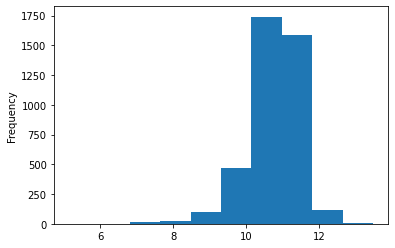

In [ ]:
from math import log
df7['Kilometers_Driven'].apply(log).plot.hist()

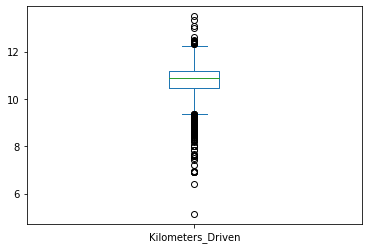

In [ ]:
df7['Kilometers_Driven'].apply(log).plot.box()

In [ ]:
df7['Kilometers_Driven'] = df7['Kilometers_Driven'].apply(log)

In [ ]:
df7.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Audi A4,BMW 3,BMW 5,...,Kolkata,Mumbai,Pune,Diesel,Others,Petrol,Automatic,Manual,First,Second or above
194,15,11.002200,19.34,1253.75,109.14,5.0,2.95,0,0,0,...,0,0,0,0,0,1,0,1,1,0
749,14,10.915107,16.35,1777.08,180.12,7.0,26.50,0,0,0,...,0,1,0,1,0,0,1,0,0,1
1385,18,11.652687,19.34,1253.75,109.14,5.0,1.50,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1460,14,11.142992,19.34,1253.75,180.12,7.0,40.88,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2096,18,10.861803,19.34,1253.75,23.16,5.0,1.93,0,0,0,...,0,0,0,0,0,1,0,1,1,0


#Removing Outliers

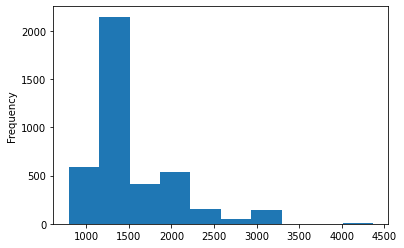

In [ ]:
df7['Engine'].plot.hist()

In [ ]:
#df7['Engine'].apply(log).plot.hist()

In [ ]:

m = df7['Engine'].mean()
s = df7['Engine'].std()

#print(m - 2*s)
#print(m + 2*s)

df8 = df7[(df7['Engine'] >= (m - 2*s)) & (df7['Engine'] <= (m + 2*s))]

df8['Engine'] = df8['Engine'].apply(log)

df8.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Audi A4,BMW 3,BMW 5,...,Kolkata,Mumbai,Pune,Diesel,Others,Petrol,Automatic,Manual,First,Second or above
194,15,11.002200,19.34,7.133894,109.14,5.0,2.95,0,0,0,...,0,0,0,0,0,1,0,1,1,0
749,14,10.915107,16.35,7.482727,180.12,7.0,26.50,0,0,0,...,0,1,0,1,0,0,1,0,0,1
1385,18,11.652687,19.34,7.133894,109.14,5.0,1.50,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1460,14,11.142992,19.34,7.133894,180.12,7.0,40.88,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2096,18,10.861803,19.34,7.133894,23.16,5.0,1.93,0,0,0,...,0,0,0,0,0,1,0,1,1,0


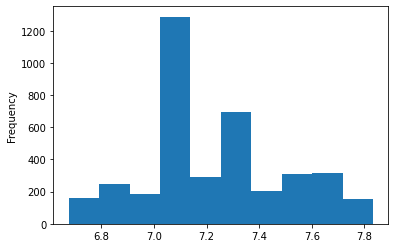

In [ ]:
df8['Engine'].plot.hist()

In [ ]:
df8['Power'] = df8['Power'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


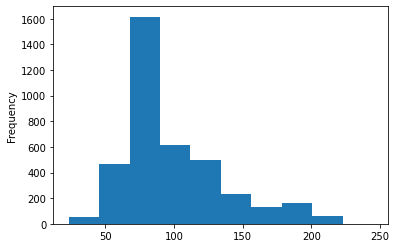

In [ ]:
df8['Power'].plot.hist()

In [ ]:
m = df8['Power'].mean()
s = df8['Power'].std()

#print(m - 2*s)
#print(m + 2*s)

df9 = df8[(df8['Power'] >= (m - 2*s)) & (df8['Power'] <= (m + 2*s))]

#df8['Engine'] = df8['Engine'].apply(log)

df9.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Audi A4,BMW 3,BMW 5,...,Kolkata,Mumbai,Pune,Diesel,Others,Petrol,Automatic,Manual,First,Second or above
194,15,11.002200,19.34,7.133894,109.14,5.0,2.95,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1385,18,11.652687,19.34,7.133894,109.14,5.0,1.50,0,0,0,...,0,0,1,0,0,1,0,1,0,1
5270,20,10.878047,19.34,7.133894,109.14,5.0,1.85,0,0,0,...,0,0,0,0,0,1,0,1,0,1
208,12,10.645449,16.10,7.133894,72.15,5.0,2.11,0,0,0,...,1,0,0,0,0,1,0,1,1,0
733,16,11.490680,16.10,7.133894,72.15,5.0,1.75,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
df9.shape

(3525, 62)

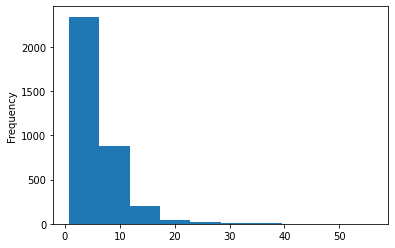

In [ ]:
df9['Price'].plot.hist()

In [ ]:
#Log transformation of price
df10 = df9.copy()

df10['Price'] = df10['Price'].apply(log)

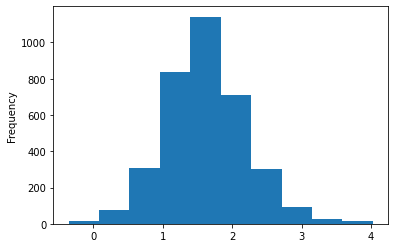

In [ ]:
df10['Price'].plot.hist()

In [ ]:
X = df10.drop('Price' , axis='columns')
Y = df10[['Price']]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [ ]:
from sklearn.linear_model import LinearRegression
lmodel1 = LinearRegression()

lmodel1.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(ytrain,lmodel1.predict(xtrain))

0.10452319651822892

In [ ]:
mean_absolute_error(ytest,lmodel1.predict(xtest))

0.10846901378078586

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytrain, lmodel1.predict(xtrain))

0.9442574224000532

In [ ]:
r2_score(ytest, lmodel1.predict(xtest))

0.9349930383021117

https://colab.research.google.com/drive/1To4IbM8vcTM__BlBuGi47aj5_YVcmdZN?usp=sharing

In [ ]:
df10.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Audi A4,BMW 3,BMW 5,...,Kolkata,Mumbai,Pune,Diesel,Others,Petrol,Automatic,Manual,First,Second or above
194,15,11.002200,19.34,7.133894,109.14,5.0,1.081805,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1385,18,11.652687,19.34,7.133894,109.14,5.0,0.405465,0,0,0,...,0,0,1,0,0,1,0,1,0,1
5270,20,10.878047,19.34,7.133894,109.14,5.0,0.615186,0,0,0,...,0,0,0,0,0,1,0,1,0,1
208,12,10.645449,16.10,7.133894,72.15,5.0,0.746688,0,0,0,...,1,0,0,0,0,1,0,1,1,0
733,16,11.490680,16.10,7.133894,72.15,5.0,0.559616,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
lmodel1.coef_

array([[-1.01759983e-01, -6.37045107e-02,  1.00400810e-03,
        -1.95472001e-01,  3.88301979e-03, -1.46733548e-02,
         8.30693650e-01,  6.64287562e-01,  1.15380908e+00,
         1.50309614e-02, -4.53169361e-01, -3.19672804e-01,
        -4.10060493e-01, -2.04833923e-02, -2.21749585e-01,
         2.56660292e-01, -7.32019891e-01, -3.83320815e-01,
        -5.89878901e-01, -9.76989807e-02, -3.73967188e-01,
        -4.04001466e-01, -1.93258169e-01,  1.15175901e+00,
         2.88173076e-01,  3.27259428e-01, -7.36411865e-01,
        -2.11145317e-01, -5.29801471e-01, -6.55359808e-04,
         1.13691718e-01, -3.89311873e-01, -2.01241537e-01,
        -5.04318283e-01,  8.74013847e-01,  8.27504450e-01,
         6.49967730e-03,  1.74891274e-01, -2.14638468e-01,
         7.49400542e-16,  6.93498780e-01, -2.54487332e-01,
        -1.36480260e-01, -3.76417887e-03,  1.51983795e-01,
         4.16449911e-02,  1.48315842e-01, -1.07974920e-01,
         1.37249661e-01, -2.42147046e-02, -7.79312582e-0

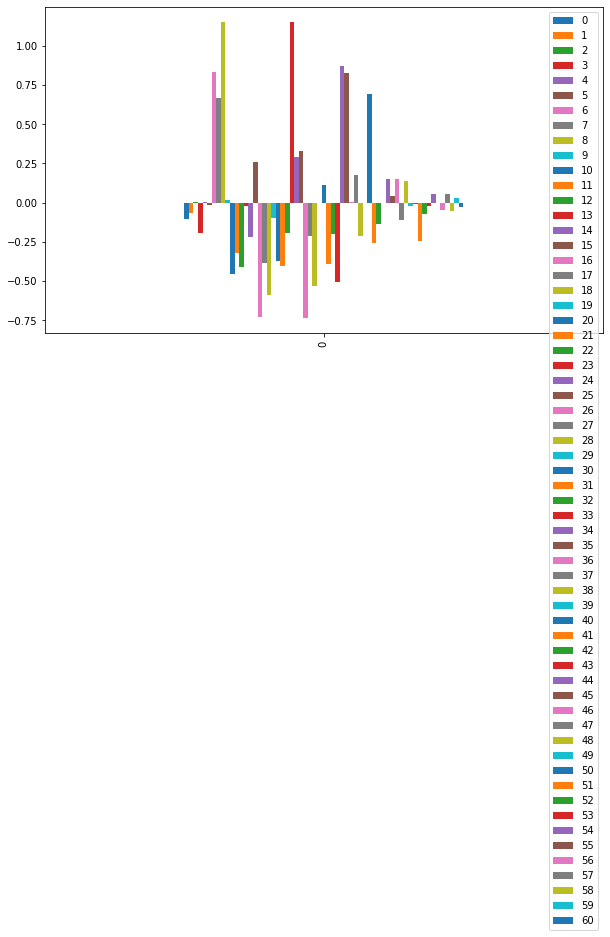

In [ ]:
pd.DataFrame(lmodel1.coef_).plot.bar(figsize=(10,6))

#Predictions

In [ ]:
xtrain.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Audi A4', 'BMW 3', 'BMW 5', 'Ford Ecosport', 'Ford Figo',
       'Honda Amaze', 'Honda Brio', 'Honda City', 'Honda Jazz',
       'Hyundai Creta', 'Hyundai EON', 'Hyundai Grand', 'Hyundai Santro',
       'Hyundai Verna', 'Hyundai Xcent', 'Hyundai i10', 'Hyundai i20',
       'Land Rover', 'Mahindra Scorpio', 'Mahindra XUV500', 'Maruti Alto',
       'Maruti Baleno', 'Maruti Celerio', 'Maruti Ciaz', 'Maruti Ertiga',
       'Maruti Ritz', 'Maruti Swift', 'Maruti Wagon', 'Mercedes-Benz E-Class',
       'Mercedes-Benz New', 'Renault Duster', 'Toyota Corolla', 'Toyota Etios',
       'Toyota Fortuner', 'Toyota Innova', 'Volkswagen Polo',
       'Volkswagen Vento', 'Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore',
       'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune',
       'Diesel', 'Others', 'Petrol', 'Automatic', 'Manual', 'First',
       'Second or above'],
      dtype='object')

In [ ]:
df6.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
input = np.zeros(len(xtrain.columns))
input

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
car_name = 'Maruti Ritz'

np.where(xtrain.columns == car_name)[0][0]

31

In [ ]:
age = 10
kms = 50000
mlg = 15.5
eng = 1367
pwr = 120
sts = 5

car_name = 'Hyundai Creta'
loc = 'Chennai'
ft = 'Diesel'
trans ='Automatic'
own_type = 'First'


input[0] = age
input[1] = np.log(kms)
input[2] = mlg
input[3] = np.log(eng)
input[4] = pwr
input[5] = sts

input[np.where(xtrain.columns == car_name)[0][0]] = 1
input[np.where(xtrain.columns == loc)[0][0]] = 1
input[np.where(xtrain.columns == ft)[0][0]] = 1
input[np.where(xtrain.columns == trans)[0][0]] = 1
input[np.where(xtrain.columns == own_type)[0][0]] = 1

print(input)

[ 10.          10.81977828  15.5          7.22037384 120.
   5.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   1.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           1.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   1.           0.           0.           0.           0.
   0.           0.           0.           0.           1.
   0.           0.           1.           1.           1.
   0.        ]


In [ ]:
lmodel1.predict([input])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[1.70754084]])

In [ ]:
print(np.exp(lmodel1.predict([input])))


[[5.51538159]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
def predict_price(age,kms,mlg,eng,pwr,sts,car_name,loc,ft,trans,own):
  input = np.zeros(len(xtrain.columns))
  
  input[0] = age
  input[1] = np.log(kms)
  input[2] = mlg
  input[3] = np.log(eng)
  input[4] = pwr
  input[5] = sts

  input[np.where(xtrain.columns == car_name)[0][0]] = 1
  input[np.where(xtrain.columns == loc)[0][0]] = 1
  input[np.where(xtrain.columns == ft)[0][0]] = 1
  input[np.where(xtrain.columns == trans)[0][0]] = 1
  input[np.where(xtrain.columns == own)[0][0]] = 1 

  return np.exp(lmodel1.predict([input]))[0][0]


In [ ]:
np.where(xtrain.columns == car_name)[0][0]

15

In [ ]:
print(predict_price(8,41000,22.3,1250,110,5,'Hyundai Creta',
                    'Delhi','Diesel','Automatic','First'))

9.047431539256417


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


#Save a model to be downloaded and reuse

In [ ]:
import pickle
with open('car_price.pickle','wb') as f:
  pickle.dump(lmodel1,f)

In [ ]:
#json :---

import json

columns = {'data-columns' : [col for col in xtrain.columns]}

json.dumps(columns)

with open('columns.json' , 'w') as f:
  f.write(json.dumps(columns))

In [ ]:
l = [2,3,4,5,6,7]
l.index(6)

4